In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import IPython as ipy
import pickle as pkl


poptypeNumber = 61 # max 55 + 6
celltypeNumber = 213 # max 207 + 6

# TO DEBUG - import and simulate only the Cell soma (to study only the Net)
reducedtest = False    

#------------------------------------------------------------------------------  
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('../../sim/cells/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
popParam = []
cellParam = []
meParamLabels = {} 
popLabelEl = {} 
cellLabel = {}

RP_L13 = []
RP_L45 = []
RP_L6 = []

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

    if mtype not in popParam:
        popParam.append(mtype)
        popLabelEl[mtype] = [] 
               
    popLabelEl[mtype].append(metype)
    
    cellParam.append(mtype + '_' + etype[0:3])

    layernumber = float(metype[1:2])
    if cellNumber[metype]*0.01 > 0.0:
        if int(layernumber) <= 3:
            RP_L13.append(mtype + '_' + etype[0:3])
            # print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        elif int(layernumber) == 6:
            RP_L6.append(mtype + '_' + etype[0:3])
            # print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        else:
            RP_L45.append(mtype + '_' + etype[0:3])
            # print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
    
S1pops = popParam[0:55]
S1cells = cellParam[0:207]

In [3]:
filename = '/home/fernando/Dropbox/SUNY/2023/results/v101/v101_batch1/v101_batch1_1_data.pkl'

timeRange = [3500, 4000]

layer_bounds= {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0]}


sim.load(filename, instantiate=True, instantiateConns = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)

# standardd plots
# sim.analysis.plotRaster(**{'include': ['allCells'], 'saveFig': True, 'showFig': False, 'labels': None, 'popRates': False,'orderInverse': True, 'timeRange': timeRange, 'figSize': (48,36), 'fontSize':4, 'lw': 2, 'markerSize':2, 'marker': '.', 'dpi': 300})
# sim.analysis.plotRaster(**{'include': RP_L13, 'saveFig': filename[:-4]+'_RP_L13', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':8, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
# sim.analysis.plotRaster(**{'include': RP_L45, 'saveFig': filename[:-4]+'_RP_L45', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':8, 'figSize': (24,18), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
# sim.analysis.plotRaster(**{'include': RP_L6, 'saveFig': filename[:-4]+'_RP_L6', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':8, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
# sim.analysis.plotSpikeStats(stats=['rate'],figSize = (6,12), timeRange=[1500, 31500], dpi=300, showFig=0, saveFig=filename[:-4]+'_stats_30sec')
#sim.analysis.plotSpikeStats(stats=['rate'],figSize = (6,12), timeRange=[1500, 6500], dpi=300, showFig=0, saveFig=filename[:-4]+'_stats_5sec')
#sim.analysis.plotLFP(**{'plots': ['spectrogram'], 'electrodes': ['avg', [0], [1], [2,3,4,5,6,7,8,9], [10, 11, 12], [13], [14, 15], [16,17,18,19]], 'timeRange': timeRange, 'maxFreq': 50, 'figSize': (8,24), 'saveData': False, 'saveFig': filename[:-4]+'_LFP_spec_7s_all_elecs', 'showFig': False})

# sim.analysis.plotRaster(**{'include': S1cells, 'saveFig': True, 'showFig': False, 'labels': None, 'popRates': False,'orderInverse': True, 'timeRange': timeRange, 'figSize': (24,24), 'fontSize':12, 'lw': 5, 'markerSize':10, 'marker': 'o', 'dpi': 300})

# sim.analysis.plotLFP(**{'plots': ['locations'], 
#         'figSize': (24,24), 
#         'saveData': False, 
#         'saveFig': True, 'showFig': False, 'dpi': 300})

# sim.analysis.plotLFP(**{'plots': ['PSD'], 
#         # 'electrodes': 
#         # [[0,1,2,3]],
#         'timeRange': timeRange, 
#         'minFreq': 100, 
#         'maxFreq': 500, 
#         'figSize': (8,12), 
#         'saveData': False, 
#         'saveFig': True, 'showFig': False})
        
# sim.analysis.plotLFP(**{'plots': ['timeSeries'], 
#         # 'electrodes': 
#         # [[0,1,2,3]], #'avg', 
#         'timeRange': timeRange, 
#         'figSize': (24,12), 'saveFig': True, 'showFig': False})

# sim.analysis.plotLFP(**{'plots': ['spectrogram'], 
#         # 'electrodes': 
#         # [[0,1,2,3]],
#         'timeRange': timeRange, 
#         'minFreq': 100, 
#         'maxFreq': 500, 
#         'figSize': (16,12), 
#         'saveData': False, 
#         'saveFig': True, 'showFig': False})
        


Start time:  2023-10-06 12:46:13.193284
Loading file /home/fernando/Dropbox/SUNY/2023/results/v101/v101_batch1/v101_batch1_1_data.pkl ... 
  Done; file loading time = 7.11 s
Loading simConfig...
Loading netParams...
Loading net...
Unable to create Python structure: 'Dict' object is not callable
  Done; re-instantiate net time = 0.01 s
Loading simData...

Creating network of 386 cell populations on 1 hosts...


  Number of cells on node 0: 38612 
  Done; cell creation time = 69.18 s.
Recording 0 traces of 0 types on node 0


Preparing LFP data...
Plotting LFP time series...
Preparing LFP data...
Preparing spectrogram data...
Plotting LFP spectrogram...


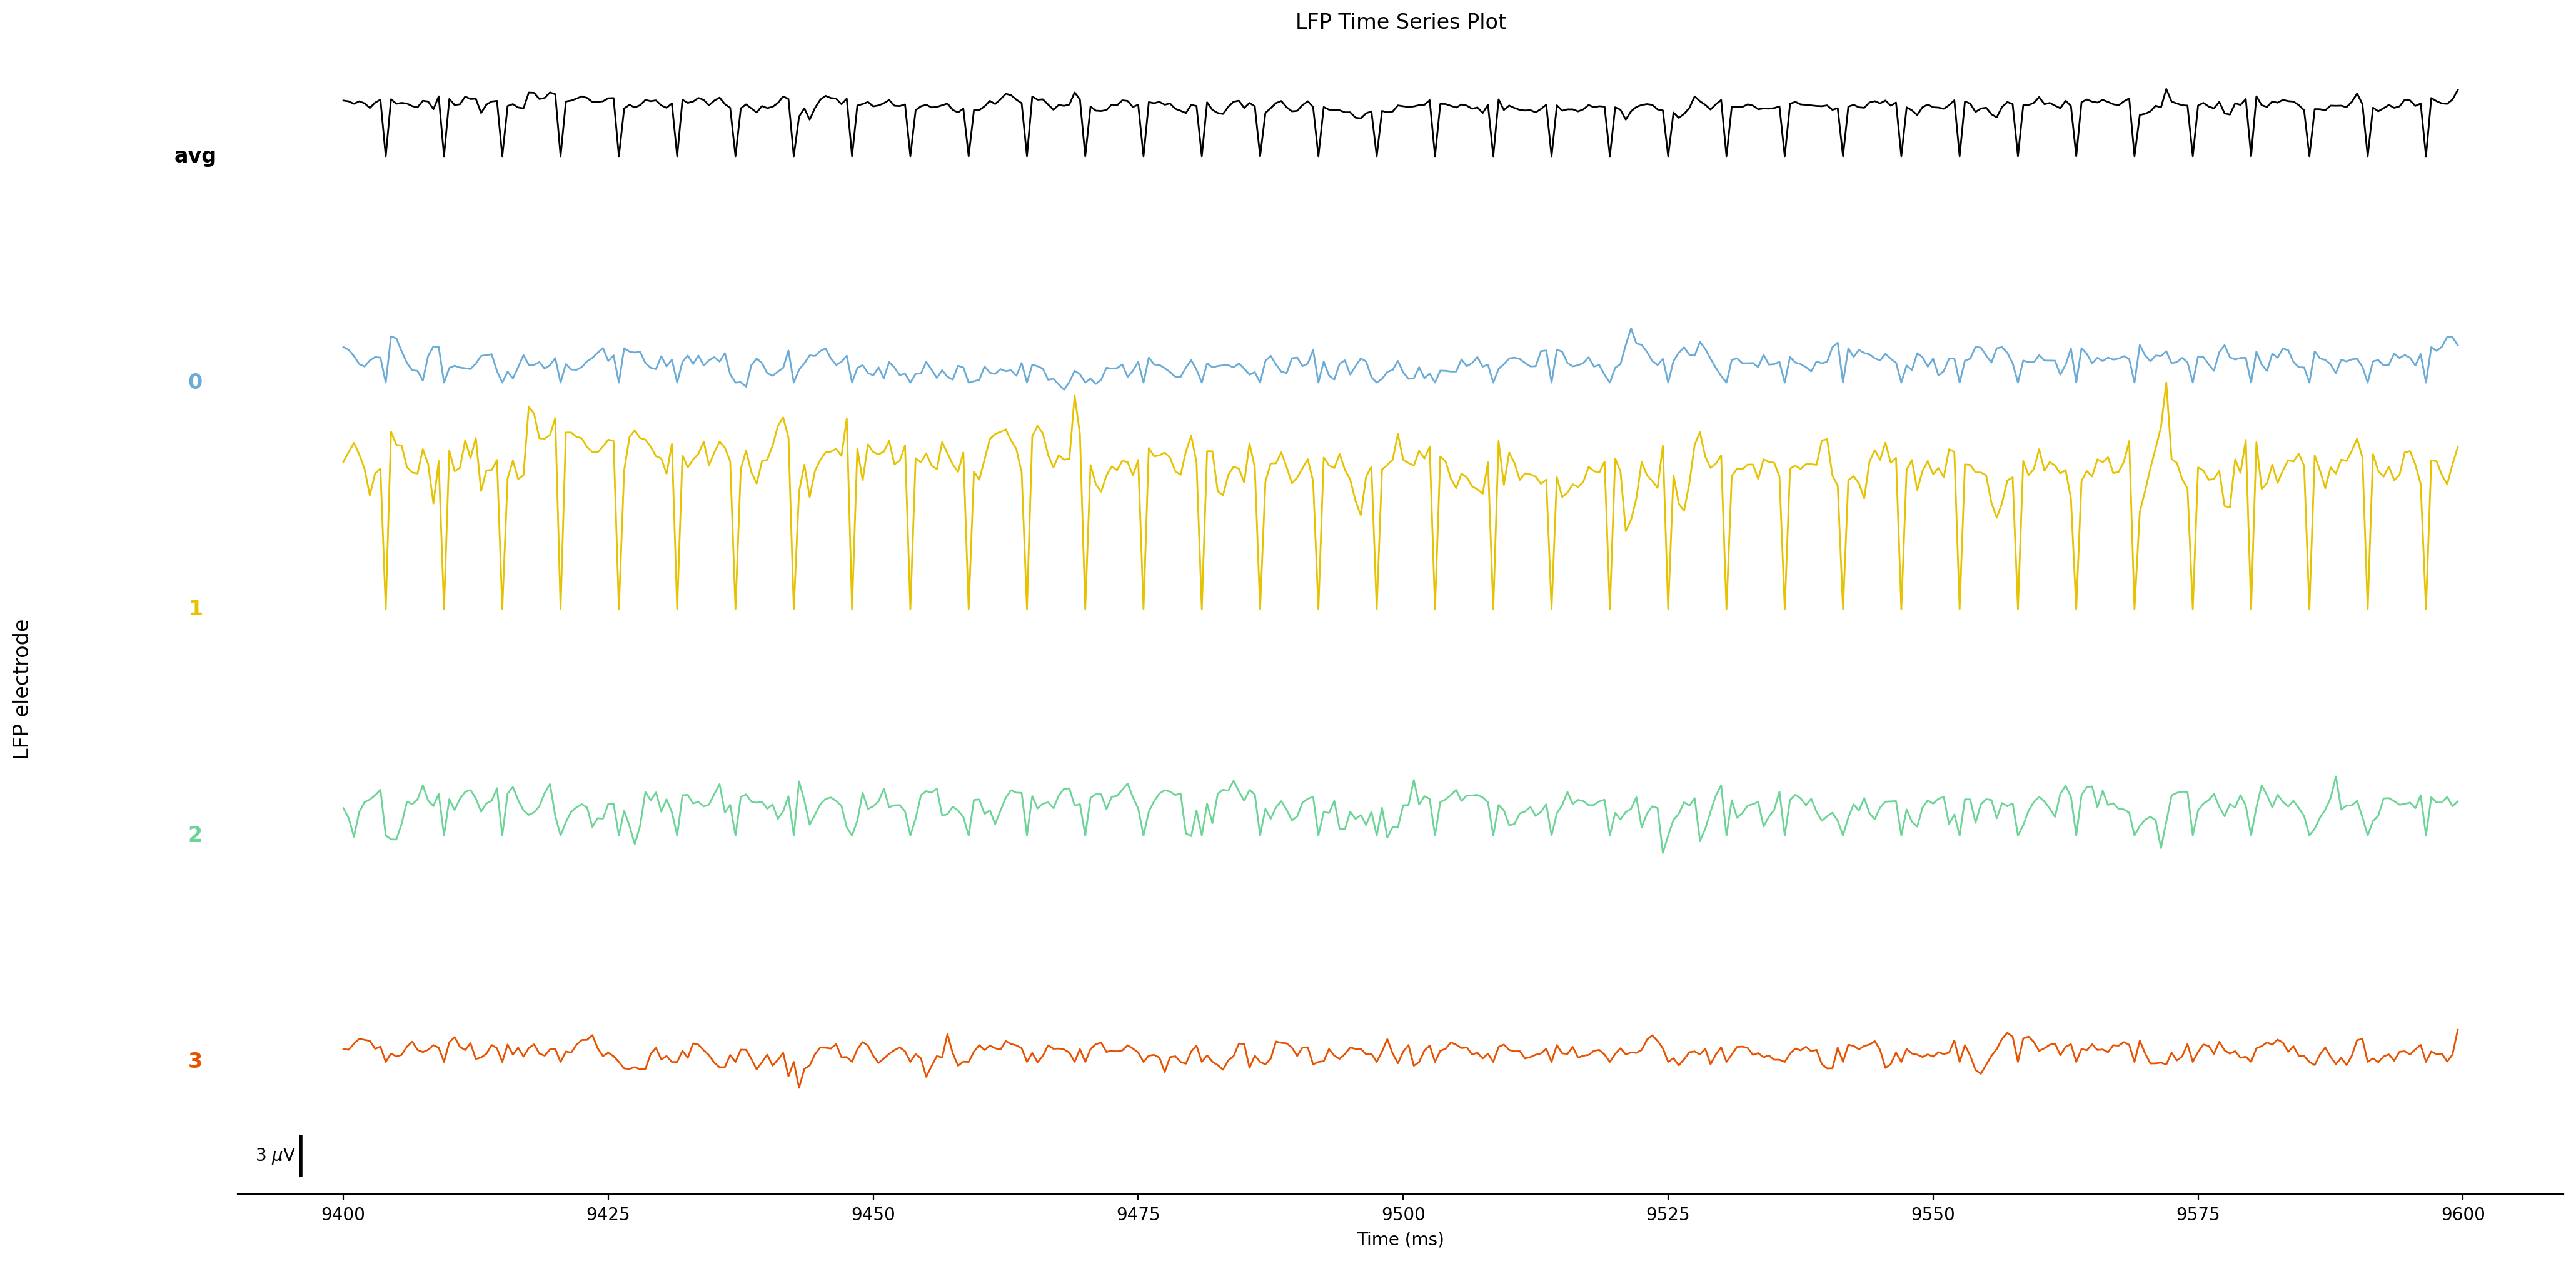

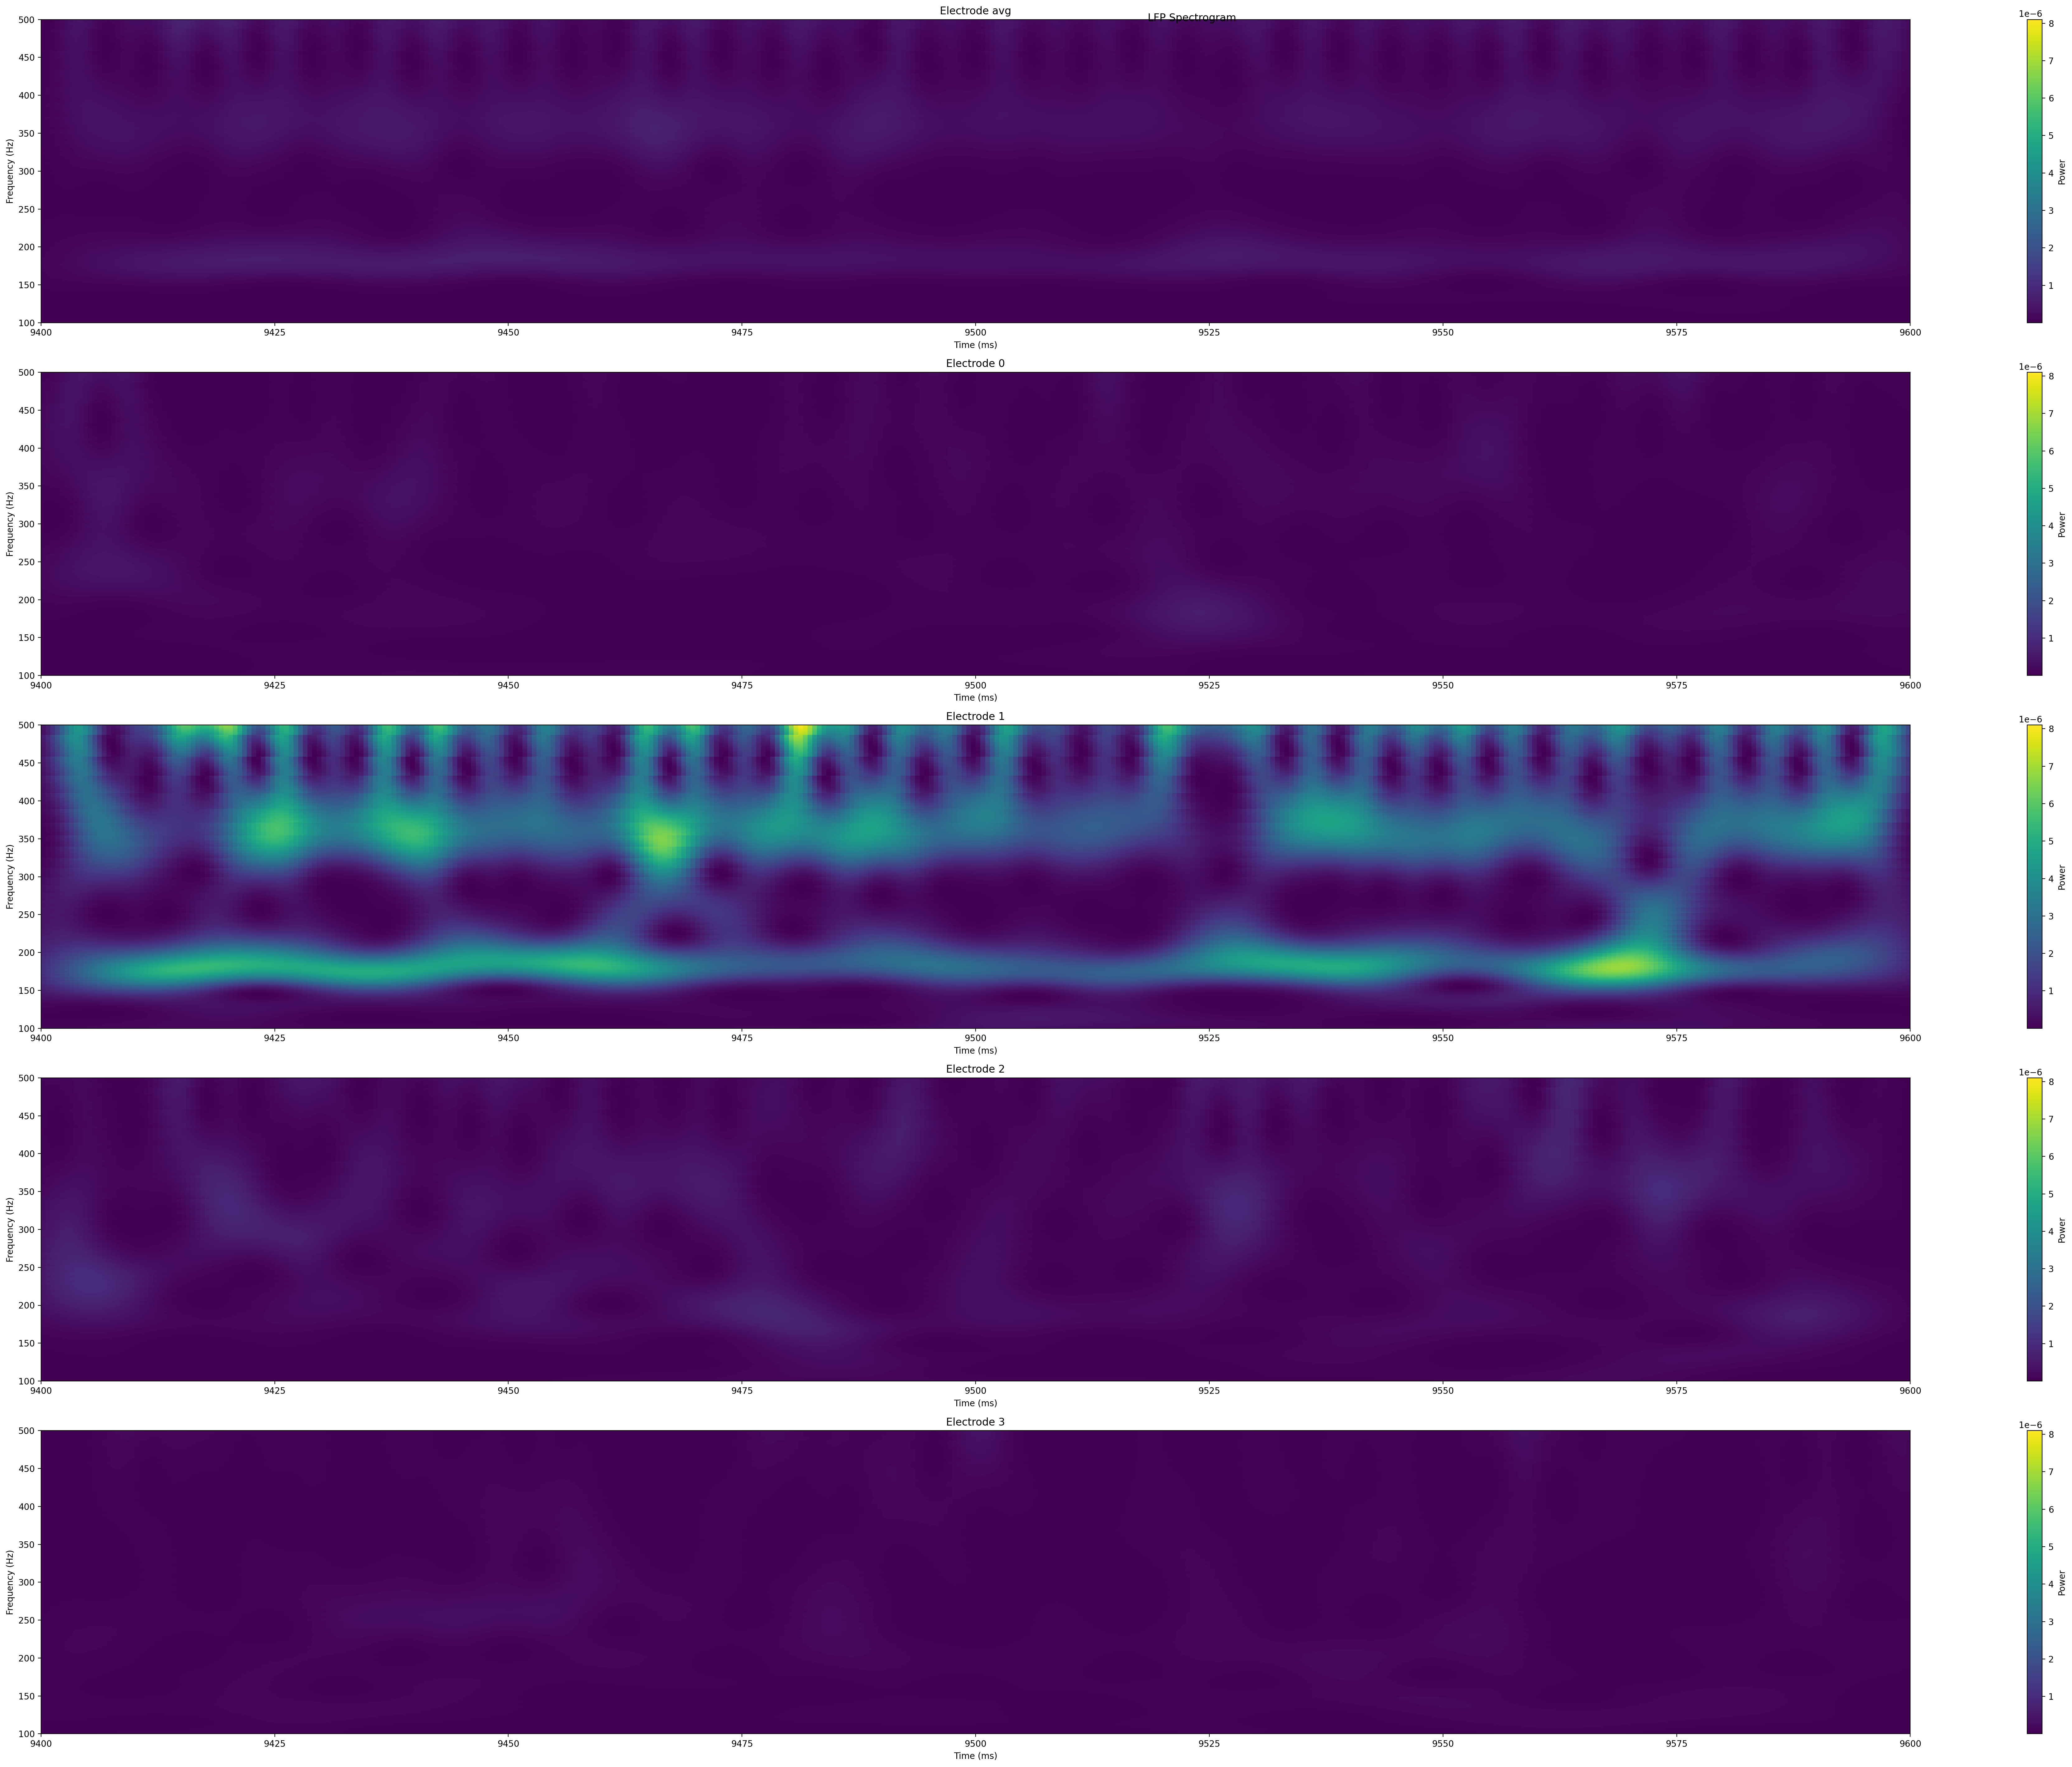

In [4]:
timeRange = [9400, 9600]

sim.analysis.plotLFP(**{'plots': ['timeSeries'], 
        # 'electrodes': 
        # [[0,1,2,3]], #'avg', 
        'timeRange': timeRange, 
        'figSize': (24,12), 'saveFig':'v101_batch1_0_timeSeries.png', 'showFig': False})


sim.analysis.plotLFP(**{'plots': ['spectrogram'], 
        # 'electrodes': 
        # [[0,1,2,3]],
        'timeRange': timeRange, 
        'minFreq': 100, 
        'maxFreq': 500, 
        'figSize': (16,12), 
        'saveData': False, 
        'saveFig':'v101_batch1_0_LFPSpectrogram.png' , 'showFig': False})

In [5]:
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

Ipops = []
Imetypes = []
Emetypes = []
for mtype in S1pops:
    if mtype not in Epops:
        Ipops.append(mtype)
        for metype in popLabelEl[mtype]:
            Imetypes.append(metype)
    else:
        for metype in popLabelEl[mtype]:
            Emetypes.append(metype)

In [6]:

from netpyne import specs
import pickle
import os
import numpy as np

cfg = specs.SimConfig()  

#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 1.5*1e4 ## Duration of the sim, in ms  
cfg.dt = 0.05
cfg.seeds = {'conn': 4322, 'stim': 1001, 'loc': 4322} 
cfg.hParams = {'celsius': 34, 'v_init': -69.5}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------
cfg.rootFolder = os.getcwd()

# Load cells info from previously saved using netpyne (False: load from HOC BBP files, slower)
cfg.loadcellsfromJSON = True

cfg.cao_secs = 1.2

cfg.use_frac = {} # use[invivo] = cfg.use_frac * use[invitro]

cfg.use_frac['EIproximal'] = 0.75 # shallow dependence between PC-proximal targeting cell types (LBCs, NBCs, SBCs, ChC)
cfg.use_frac['Inh'] = 0.50 # Pathways that had not been studied experimentally were assumed to have an intermediate level of dependence
cfg.use_frac['EE'] = 0.25 # steep Ca2+ dependence for connections between PC-PC and PC-distal targeting cell types (DBC, BTC, MC, BP)
cfg.use_frac['EIdistal'] = 0.25 

# TO DEBUG - import and simulate only the Cell soma (to study only the Net)
cfg.reducedtest = False    

#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('../sim/cells/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

cfg.popNumber = {}
cfg.cellNumber = {} 
cfg.popLabel = {} 
cfg.cellLabel = {}

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cfg.cellNumber[metype] = int(n)
    cfg.popLabel[metype] = mtype
    cfg.popNumber[mtype] = int(m)
    cfg.cellLabel[metype] = cellname

#------------------------------------------------------------------------------  
# Thalamic Cells

cfg.thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

cfg.cellNumber['ss_RTN_o'] = int(382 * (210**2/150**2)) # from mouse model (d = 150 um)
cfg.cellNumber['ss_RTN_m'] = int(382 * (210**2/150**2))
cfg.cellNumber['ss_RTN_i'] = int(765 * (210**2/150**2))
cfg.cellNumber['VPL_sTC'] = int(656 * (210**2/150**2))
cfg.cellNumber['VPM_sTC'] = int(839 * (210**2/150**2))
cfg.cellNumber['POm_sTC_s1'] = int(685 * (210**2/150**2))

for mtype in cfg.thalamicpops: # No diversity
	metype = mtype
	cfg.popLabel[metype] = mtype
	cfg.popNumber[mtype] = cfg.cellNumber[metype]

#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------

## Load spkTimes and cells positions
with open('../data/spkTimes_v9_batch8_highgsynCT.pkl', 'rb') as fileObj: simData = pickle.load(fileObj)
spkTimes = simData['spkTimes']
cellsTags = simData['cellsTags']

# create custom list of spike times
cellsVSName = {}
for cellLabel in spkTimes.keys():    
    cellme = cellLabel.split('_')[0:-1]    
    metype = cellme[0]
    for i in range(1,np.size(cellme)):
        metype += '_' + cellme[i]
                   
    if metype not in cellsVSName.keys():
        cellsVSName[metype] = []
        
    mtype = cfg.popLabel[metype]            
    cellsVSName[metype].append('presyn_'+cellLabel)

#------------------------------------------------------------------------------
cfg.cynradNumber = 1
cfg.fracmorphoradius = 1.0/2.0

excluderadius2a = (cfg.cynradNumber-1)*(0.5*cfg.fracmorphoradius)**2
excluderadius2b = (cfg.cynradNumber)*(0.5*cfg.fracmorphoradius)**2

cfg.Nmorpho = {}    
cfg.listmorphonumber = {}

print('radius from',420*np.sqrt(excluderadius2a),'to',420*np.sqrt(excluderadius2b),'micrometers')

#------------------------------------------------------------------------------
# create 1 vectstim pop per cell gid
for metype in cellsVSName.keys(): # metype
       
    for cellLabel in cellsVSName[metype]: # all cells in metype

        mtype = cfg.popLabel[metype]    
        ii = int(cellLabel.split('_')[-1])
        radiuscCell2 = (cellsTags[ii]['xnorm']-0.5)**2 + (cellsTags[ii]['znorm']-0.5)**2

        if metype[0] == 'L' and radiuscCell2 >= excluderadius2a and radiuscCell2 < excluderadius2b:   

            if metype not in cfg.listmorphonumber.keys():
                cfg.listmorphonumber[metype] = []

            cfg.listmorphonumber[metype].append(ii)     

            if metype not in cfg.Nmorpho.keys():
                cfg.Nmorpho[metype] = 0

            cfg.Nmorpho[metype] += 1

#------------------------------------------------------------------------------
cfg.Epopsall = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
cfg.Ipops = []
cfg.Epops = [] 
cfg.S1pops = []
cfg.S1cells = []
cfg.popLabelEl = {}

for metype in  cfg.Nmorpho.keys(): # metype      
    if  cfg.Nmorpho[metype] > 0:  
        cfg.S1cells.append(metype)
        mtype = cfg.popLabel[metype]            
        if mtype in cfg.Epopsall:            
            if mtype not in cfg.Epops:
                cfg.Epops.append(mtype)
                cfg.S1pops.append(mtype)
                cfg.popLabelEl[mtype] = [] 
            cfg.popLabelEl[mtype].append(metype)            
        else:            
            if mtype not in cfg.Ipops:                
                cfg.Ipops.append(mtype)  
                cfg.S1pops.append(mtype)  
                cfg.popLabelEl[mtype] = [] 
            cfg.popLabelEl[mtype].append(metype)      

#------------------------------------------------------------------------------  
#
#------------------------------------------------------------------------------  
cfg.popParamLabels = cfg.S1pops
cfg.cellParamLabels = cfg.S1cells

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.allpops = cfg.cellParamLabels
cfg.cellsrec = 1
if cfg.cellsrec == 0:  cfg.recordCells = cfg.allpops # record all cells
elif cfg.cellsrec == 1: cfg.recordCells = [(pop,0) for pop in cfg.allpops] # record one cell of each pop
elif cfg.cellsrec == 2: # record one cell of each cellMEtype # need more test!!!
    cfg.recordCells = []
    for metype in cfg.cellParamLabels:
        if cfg.cellNumber[metype] < 5:
            for numberME in range(cfg.cellNumber[metype]):
                cfg.recordCells.append((metype,numberME))
        else:
            numberME = 0
            diference = cfg.cellNumber[metype] - 5.0*int(cfg.cellNumber[metype]/5.0)
            
            for number in range(5):            
                cfg.recordCells.append((metype,numberME))
                
                if number < diference:              
                    numberME+=int(np.ceil(cfg.cellNumber[metype]/5.0))  
                else:
                    numberME+=int(cfg.cellNumber[metype]/5.0)

cfg.recordTraces = {'V_soma': {'sec':'soma', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.5       


FileNotFoundError: [Errno 2] No such file or directory: '../sim/cells/S1-cells-distributions-Rat.txt'

In [ ]:
timeRange = [3000, 8000]
# sim.analysis.plotTraces(include = cfg.recordCells[0:55], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-100,50], subtitles= False, axis=False, scaleBarLoc=1, figSize=(24, 24), fontSize=48, saveFig=True);

In [ ]:
sim.analysis.plotTraces(include = [('L6_IPC_cAD', 0), ('L6_TPC_L1_cAD', 0), ('L6_TPC_L4_cAD', 0), ('L6_UTPC_cAD', 0)], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-100,50], subtitles= False, axis=False, scaleBarLoc=1, figSize=(12, 4), fontSize=1, saveFig=True);

In [ ]:
sim.analysis.plotTraces(include = [('L4_PC_cAD', 0), ('L4_SP_cAD', 0), ('L4_SS_cAD', 0), ('L5_STPC_cAD', 0),('L5_TTPC1_cAD', 0),('L5_TTPC2_cAD', 0),('L5_UTPC_cAD', 0)], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-100,50], subtitles= False, axis=False, scaleBarLoc=1, figSize=(12, 4), fontSize=1, saveFig=True);

In [ ]:
sim.analysis.plotRaster(**{'include': Emetypes[0], 'saveFig': True, 'showFig': False, 'popRates': True,'orderInverse': True, 'timeRange': timeRange, 'figSize': (12,4), 'fontSize':48, 'lw': 2, 'markerSize':4, 'marker': 'o', 'dpi': 200})

In [ ]:
for cellpoplabel in [RP_L13]:
    sim.analysis.plotRaster(**{'include': cellpoplabel, 'saveFig': True, 'showFig': False, 'labels': True, 'popRates': True,'orderInverse': True, 'timeRange': timeRange, 'figSize': (18,4), 'fontSize':48, 'lw': 1, 'markerSize':2, 'marker': 'o', 'dpi': 200})

In [ ]:
for cellpoplabel in [RP_L45]:
    sim.analysis.plotRaster(**{'include': cellpoplabel, 'saveFig': True, 'showFig': False, 'labels': True, 'popRates': True,'orderInverse': True, 'timeRange': timeRange, 'figSize': (18,7), 'fontSize':48, 'lw': 1, 'markerSize':1, 'marker': '.', 'dpi': 200})

In [ ]:
sim.analysis.plotTraces(**{'include': 'cell_0', 'oneFigPer': 'trace', 'overlay': True, 'timeRange': timeRange, 'ylim': [-100,50], 'saveFig': True, 'showFig': False, 'figSize':(4,3)})

In [ ]:
for cellpoplabel in [RP_L6]:
    sim.analysis.plotRaster(**{'include': cellpoplabel, 'saveFig': True, 'showFig': False, 'labels': True, 'popRates': True,'orderInverse': True, 'timeRange': timeRange, 'figSize': (18,8), 'fontSize':48, 'lw': 1, 'markerSize':1, 'marker': '.', 'dpi': 200})

In [ ]:
sim.analysis.plotRaster(**{'include': S1cells, 'saveFig': True, 'showFig': False, 'labels': None, 'popRates': False,'orderInverse': True, 'timeRange': timeRange, 'figSize': (18,18), 'fontSize':24, 'lw': 1, 'markerSize':1, 'marker': '.', 'dpi': 200})

In [ ]:
S1cells